In [1]:
import pandas as pd
import numpy as np

Load data into dataframe

In [2]:
features_data = pd.read_csv('Features data set.csv', sep = ",")
stores_data = pd.read_csv('stores data-set.csv',sep=',')
sales_data = pd.read_csv('sales data-set.csv',sep = ',')

In [3]:
display(features_data.head())
display(stores_data.head())
display(sales_data.head())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
merged_sales_feature = pd.merge(features_data, sales_data, how='right', on = ['Store','Date','IsHoliday'])
final_data = pd.merge(stores_data,merged_sales_feature, how='right', on = 'Store')
final_data.shape

(421570, 16)

In [5]:
#final_data.to_csv("combined_data.csv",sep = ',')

In [6]:
#final_data.head()

Convert date object into datetime64 for comparison in the future

In [7]:
final_data['Date']=pd.to_datetime(final_data['Date'],format = '%d/%m/%Y',yearfirst = True)
final_data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


Create new dataframe called store_time_grouped for time-series analysis

In [8]:
store_time_grouped=final_data.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index(name='Total_Weekly_Sales')
store_time_grouped.sort_values(by = ['Store', 'Date'])
store_time_grouped.head(10)

,Store,Date,Total_Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


Extract Store 1 as an example to perform time-series analysis

In [9]:
Store_1= store_time_grouped[store_time_grouped['Store']==1][['Date','Total_Weekly_Sales']]
Store_1.head()

,Date,Total_Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


/Users/K21G/anaconda3/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


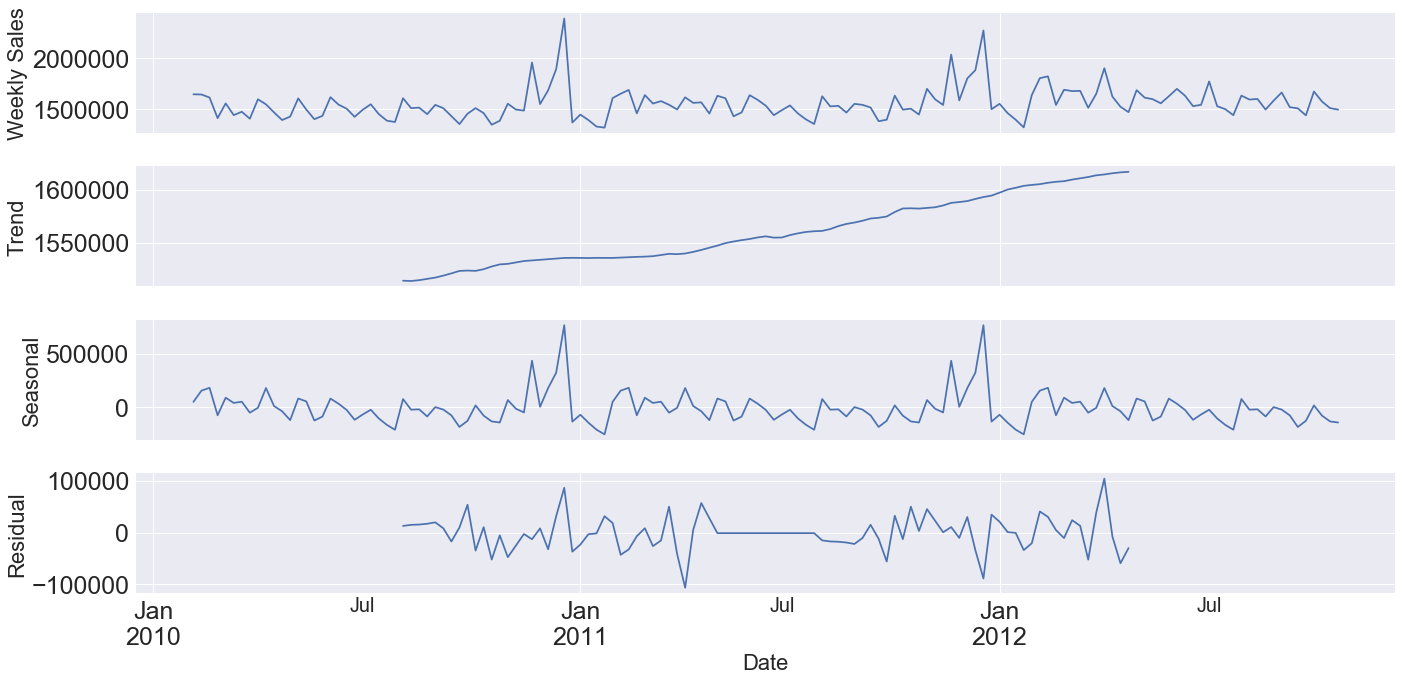

In [10]:
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
seaborn.set(font_scale=2)
Store_1_ts = pd.Series(data=Store_1['Total_Weekly_Sales'].values, index = Store_1['Date'])
#Store_1_ts.plot(label = 'Time-series plot of Store 1')
#plt.ylabel('Weekly Sales')
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20,10))
result = seasonal_decompose(Store_1_ts, model='additive')
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Weekly Sales')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')
for i in range(4):
    axes[i].tick_params(axis='both', labelsize=25)
    axes[i]
    

plt.tight_layout()
plt.show()


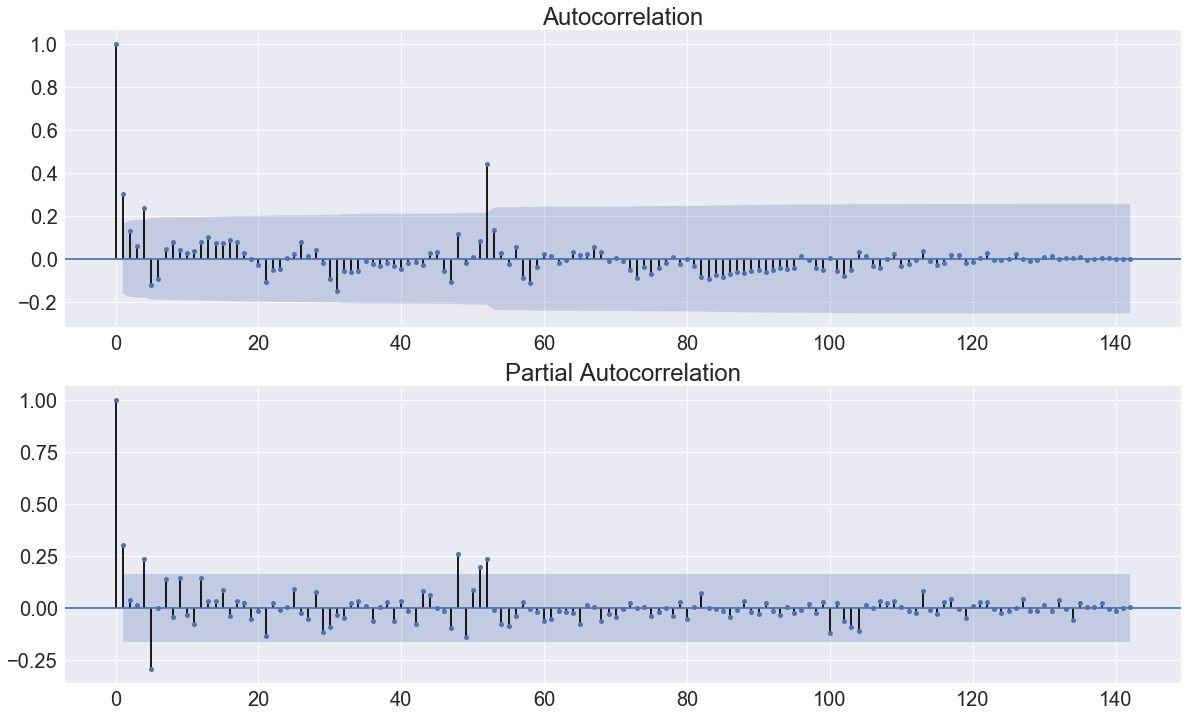

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20,12))
plt.subplot(211)
plot_acf(Store_1_ts, ax=plt.gca())
plt.subplot(212)
plot_pacf(Store_1_ts, ax=plt.gca())
plt.show()

In [12]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 4)
d=range(1,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 52)
SARIMAX: (0, 1, 1) x (0, 1, 2, 52)
SARIMAX: (0, 1, 2) x (0, 1, 3, 52)
SARIMAX: (0, 1, 2) x (1, 1, 0, 52)


In [13]:
import statsmodels.api as sm
parameters ={}
for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            mod = sm.tsa.statespace.SARIMAX(Store_1_ts[:'2012-07-27'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
            parameters[results.aic] = [param,param_seasonal]
        except:
            continue

ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:651.300708462
ARIMA(0, 1, 1)x(0, 1, 0, 52)52 - AIC:1902.0237372
ARIMA(0, 1, 1)x(1, 1, 0, 52)52 - AIC:638.735393501
ARIMA(0, 1, 2)x(0, 1, 0, 52)52 - AIC:1884.97665666
ARIMA(0, 1, 2)x(1, 1, 0, 52)52 - AIC:640.829182974
ARIMA(0, 1, 3)x(0, 1, 0, 52)52 - AIC:1840.412138
ARIMA(0, 1, 3)x(1, 1, 0, 52)52 - AIC:633.564192551
ARIMA(1, 1, 0)x(0, 1, 0, 52)52 - AIC:1941.66147536
ARIMA(1, 1, 0)x(1, 1, 0, 52)52 - AIC:624.291840932
ARIMA(1, 1, 1)x(0, 1, 0, 52)52 - AIC:1918.73005816
ARIMA(1, 1, 1)x(1, 1, 0, 52)52 - AIC:615.913229032
ARIMA(1, 1, 2)x(0, 1, 0, 52)52 - AIC:1879.28433209
ARIMA(1, 1, 2)x(1, 1, 0, 52)52 - AIC:617.024450678
ARIMA(1, 1, 3)x(0, 1, 0, 52)52 - AIC:1842.42436977
ARIMA(1, 1, 3)x(1, 1, 0, 52)52 - AIC:612.053180001
ARIMA(2, 1, 0)x(0, 1, 0, 52)52 - AIC:1904.06771539
ARIMA(2, 1, 0)x(1, 1, 0, 52)52 - AIC:593.611200944
ARIMA(2, 1, 1)x(0, 1, 0, 52)52 - AIC:1900.03515987
ARIMA(2, 1, 1)x(1, 1, 0, 52)52 - AIC:589.01623939
ARIMA(2, 1, 2)x(0, 1, 0, 52)52 - AI

In [14]:
parameters[min(parameters)]

[(3, 1, 0), (1, 1, 0, 52)]

In [15]:
mod = sm.tsa.statespace.SARIMAX(Store_1_ts,
                                            order=(3,1,0),
                                            seasonal_order=(1,1,0,52),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8353      0.205     -4.074      0.000      -1.237      -0.433
ar.L2         -0.6959      0.141     -4.939      0.000      -0.972      -0.420
ar.L3         -0.4408      0.120     -3.675      0.000      -0.676      -0.206
ar.S.L52      -0.6280      0.268     -2.346      0.019      -1.153      -0.103
sigma2      4.847e+09    1.6e-11   3.02e+20      0.000    4.85e+09    4.85e+09


/Users/K21G/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


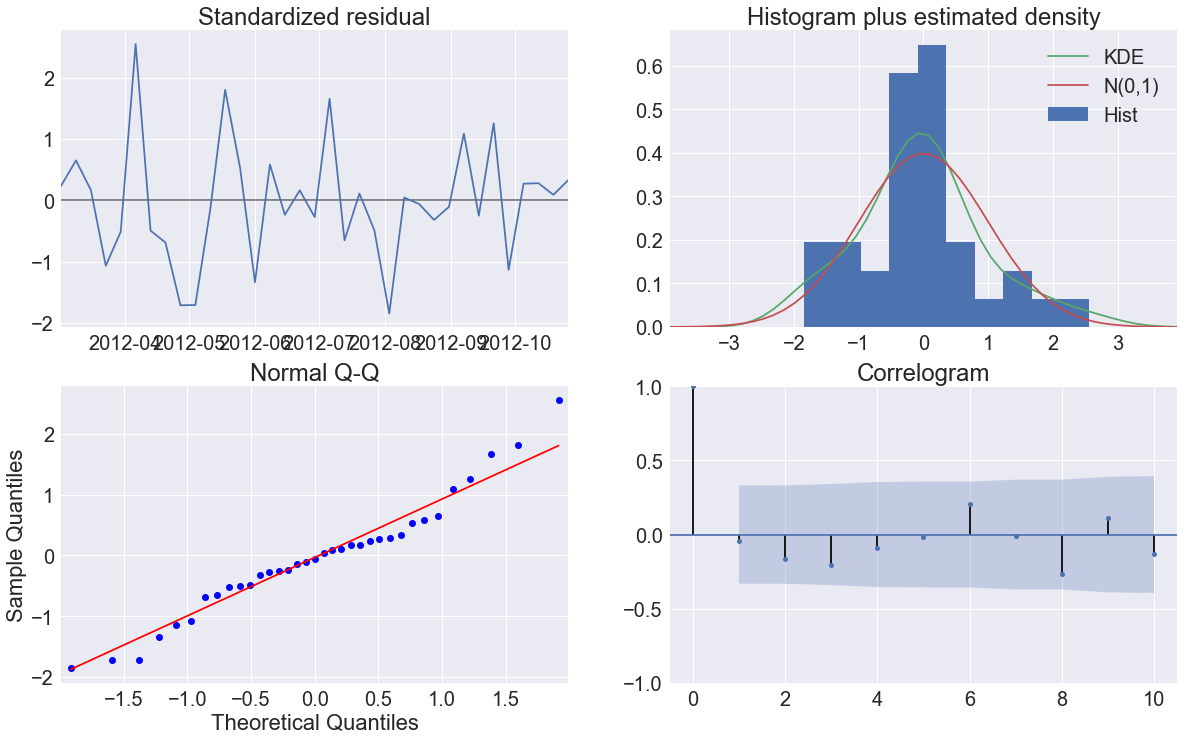

In [16]:
results.plot_diagnostics(figsize=(20, 12))
plt.show()

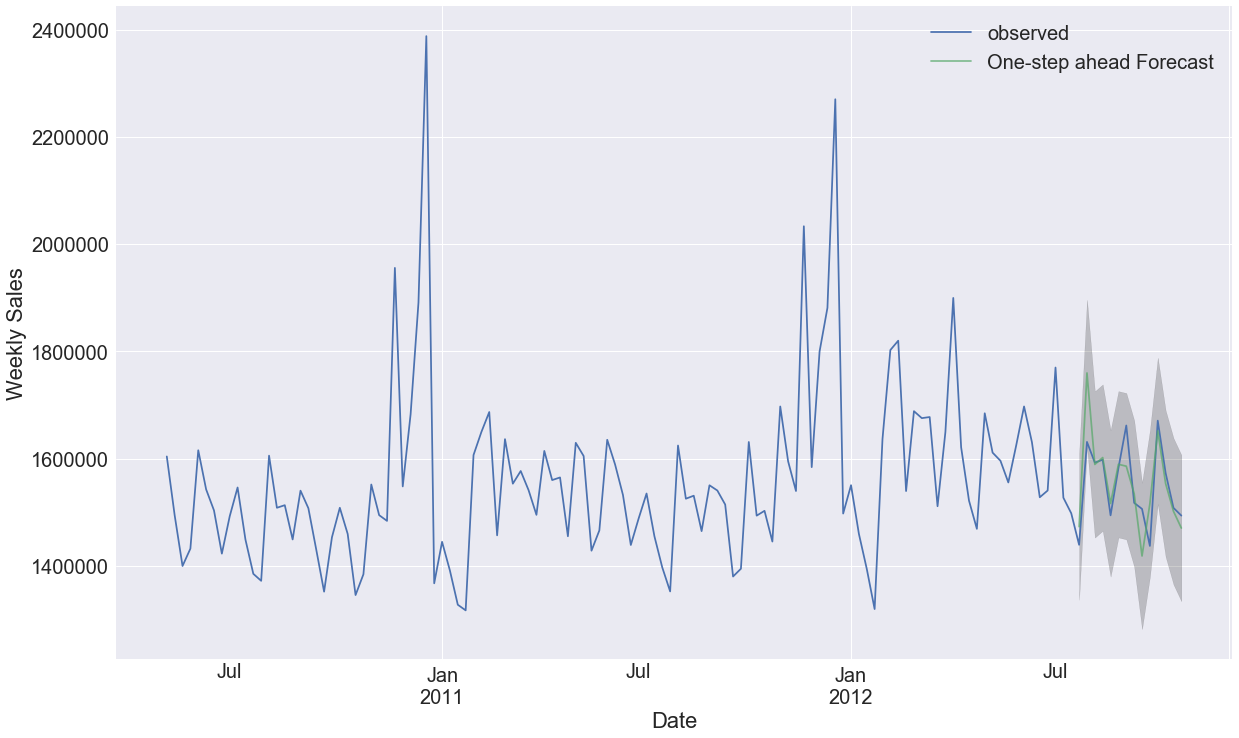

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()
ax = Store_1_ts['2010-05-02':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7,figsize=(20,12))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8391      0.254     -3.304      0.001      -1.337      -0.341
ar.L2         -0.7568      0.162     -4.677      0.000      -1.074      -0.440
ar.L3         -0.5182      0.144     -3.600      0.000      -0.800      -0.236
ar.S.L52      -0.7230      0.323     -2.238      0.025      -1.356      -0.090
sigma2      5.173e+09   2.83e-11   1.82e+20      0.000    5.17e+09    5.17e+09


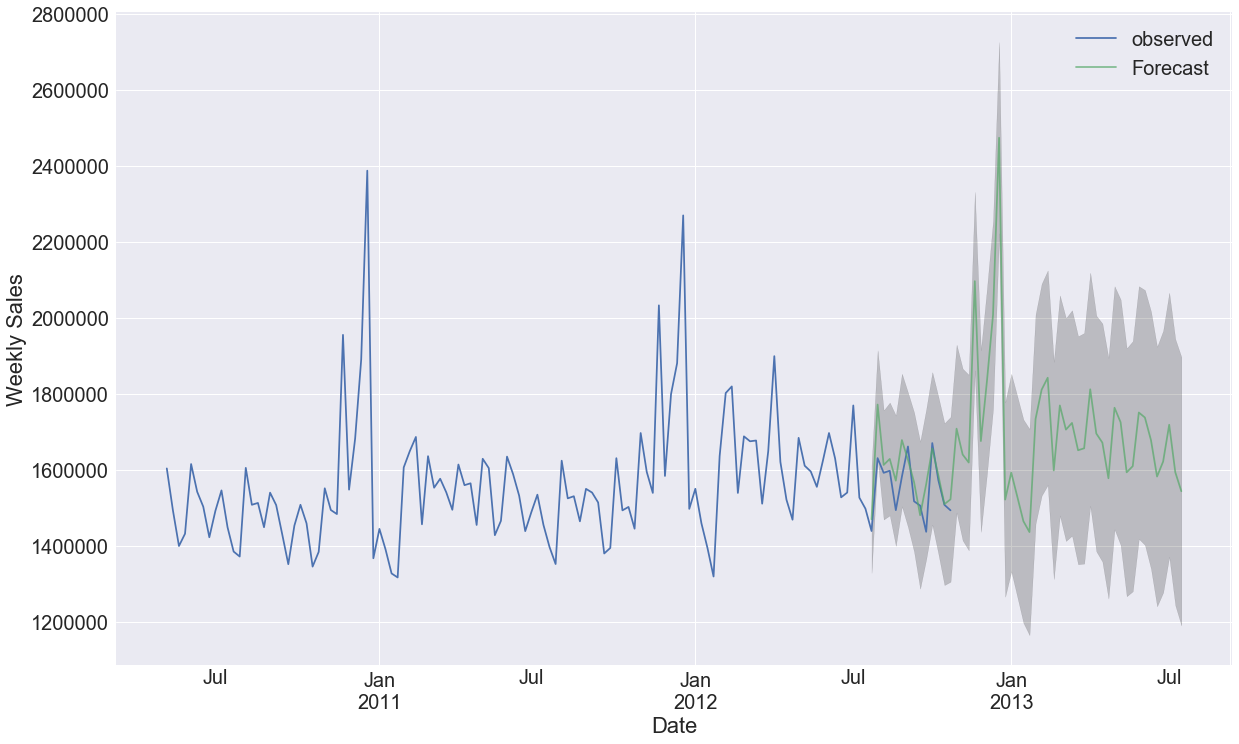

In [18]:
mod = sm.tsa.statespace.SARIMAX(Store_1_ts[:'2012-07-20'],
                                            order=(3,1,0),
                                            seasonal_order=(1,1,0,52),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred_fc = results.get_forecast(steps=52)
pred_ci = pred_fc.conf_int()
ax = Store_1_ts['2010-05-02':].plot(label='observed')
pred_fc.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7,figsize=(20,12))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()

## Try using machine learning to predict the future sales

In [19]:
Store_Annual_Sales = final_data[['Store','Date','Weekly_Sales']].groupby(['Store',final_data.Date.dt.year])['Weekly_Sales'].count().reset_index(name="Annual_Sales")
Store_3y_Sales = final_data[['Store','Date','Weekly_Sales']].groupby(['Store'])['Weekly_Sales'].count().reset_index(name="3_Year_Sales")
Store_3y_Sales

,Store,3_Year_Sales
0,1,10244
1,2,10238
2,3,9036
3,4,10272
4,5,8999
5,6,10211
6,7,9762
7,8,9895
8,9,8867
9,10,10315


In [20]:
Feature_Map_sales = final_data[['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2',\
                               'MarkDown3','MarkDown4','MarkDown5','CPI', 'Unemployment','IsHoliday',\
                                'Dept']]

In [21]:
def plot_corr(df,size=10):
    seaborn.set(font_scale=2)
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.grid(False)
    ax.set_aspect("equal")
    seaborn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,vmin=-1, vmax=1)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

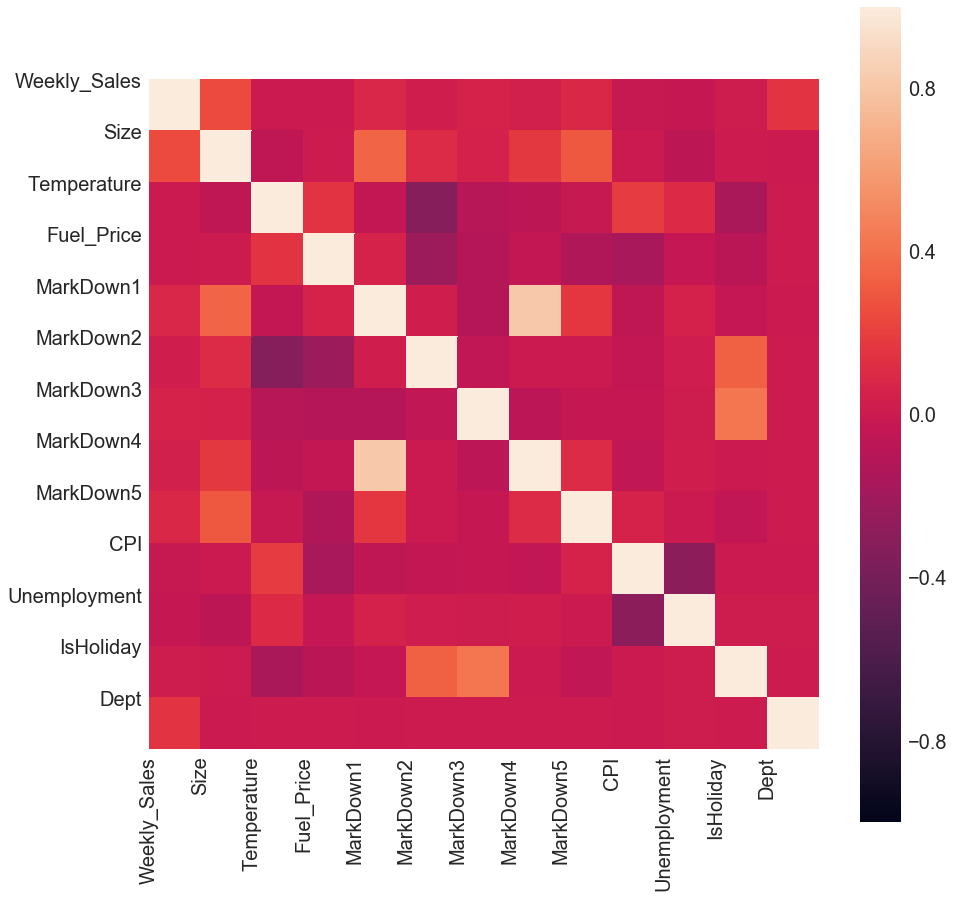

In [22]:
plot_corr(Feature_Map_sales,size=15)

In [23]:
final_data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


Remove Date, Weely sales from the features

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
ml_data = final_data.copy()
y = ml_data['Weekly_Sales']
x = ml_data.drop(columns = ['Date','Weekly_Sales','Store'])
x.head()

,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept
0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1
1,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2
2,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3
3,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4
4,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5


Convert Type A,B,C to numerical number 1,2,3

In [25]:
x.groupby('Type').size()

Type
A    215478
B    163495
C     42597
dtype: int64

In [26]:
x['Type'] = x['Type'].map(lambda x: 1 if x=='A' else 2 if x=='B' else 3 if x=='C' else 0)
x[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]=x[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
x.head(50)

,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept
0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1
1,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2
2,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3
3,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4
4,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5
5,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,6
6,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,7
7,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,8
8,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,9
9,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,10


Split the data into train and test subsets

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)



Using decision tree regressor to fit the data

In [95]:
learn_cv = pd.Series()
for dp in range(1,31,2):
    regr = DecisionTreeRegressor(max_depth=dp)
    regr.fit(X_train, y_train)
    accuracy = regr.score(X_test, y_test)
    print accuracy
    learn_cv.set_value(dp,accuracy)

0.11593146173657731


/Users/K21G/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


0.36280917949705094
0.531631942819071
0.7436332043197853
0.8134394533151004
0.8595899115306015
0.8907579802017953
0.9001113538468015
0.8989902547315782
0.9053787728054721
0.9065192816358103
0.9019200553340498
0.9036536341110453
0.9051170900091131
0.9046346873854951


Text(0,0.5,'Accuracy')

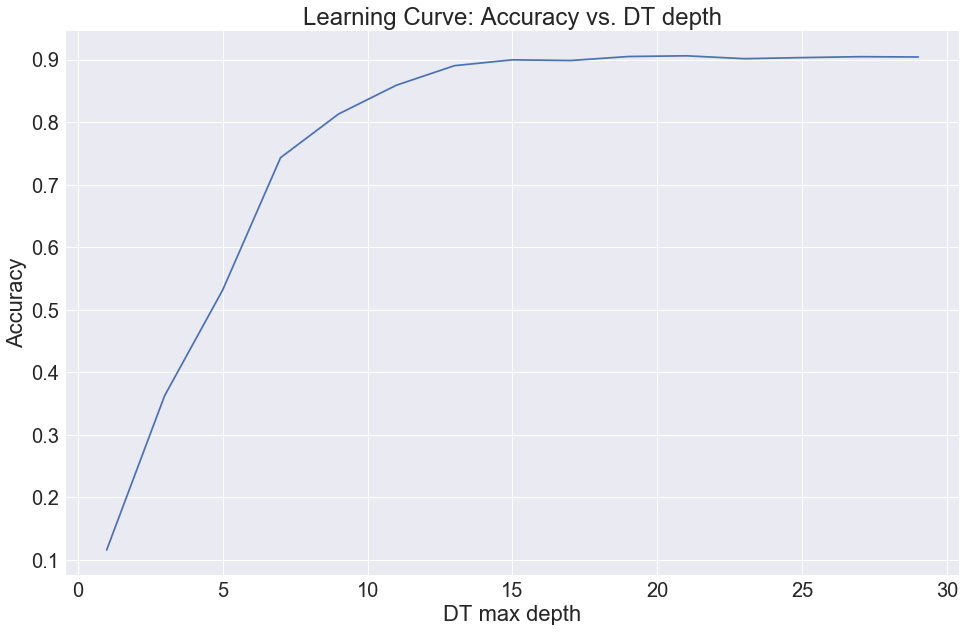

In [96]:
ax = learn_cv.plot(label = 'Accuracy',title = 'Learning Curve: Accuracy vs. DT depth',figsize=(16,10))
ax.set_xlabel("DT max depth")
ax.set_ylabel("Accuracy")

In [97]:
feature_impt = pd.Series(regr.feature_importances_, index = x.columns)
display(feature_impt.sort_values(ascending=False))

Dept            0.630066
Size            0.222927
CPI             0.040173
Unemployment    0.026601
Temperature     0.019019
Fuel_Price      0.018967
Type            0.016460
MarkDown3       0.015283
MarkDown4       0.002956
IsHoliday       0.002349
MarkDown2       0.002174
MarkDown5       0.001555
MarkDown1       0.001470
dtype: float64

In [98]:
from sklearn.ensemble import RandomForestRegressor
for dp in range(1,31,2):
    regr = RandomForestRegressor(max_depth=dp)
    regr.fit(X_train, y_train)
    accuracy = regr.score(X_test, y_test)
    print accuracy
    learn_cv.set_value(dp,accuracy)

0.11593700378299265


/Users/K21G/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


0.36368582753643197
0.5322089959025347
0.7491150697961977
0.8246341438944091
0.877808854393668
0.904870439969245
0.9206104683307639
0.9289792435694807
0.93544831040139
0.9348464908407326
0.9377569418770744
0.9396125225711763
0.9378620101566579
0.9325108528371181


Text(0,0.5,'Accuracy')

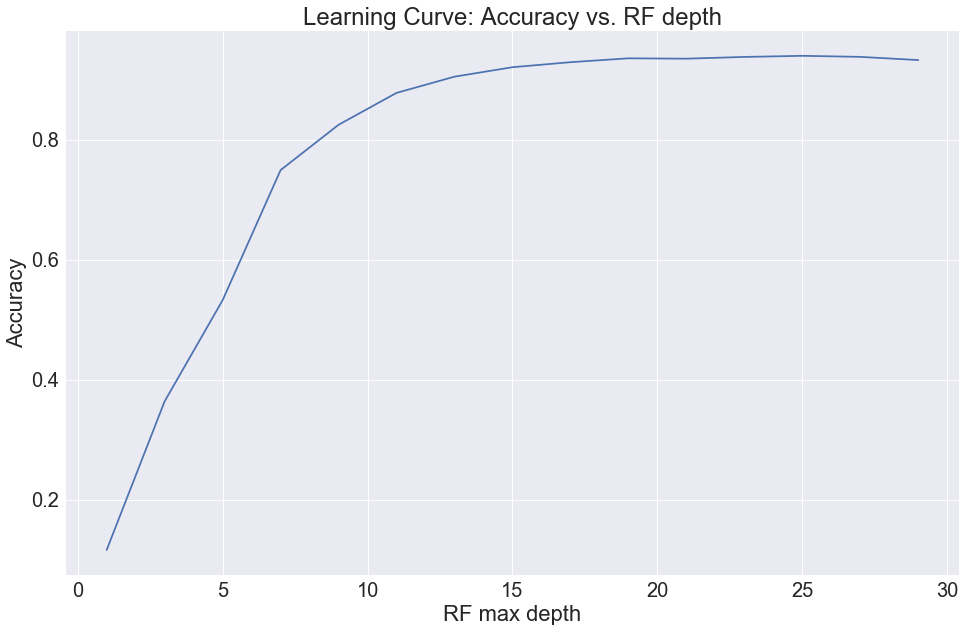

In [99]:
ax = learn_cv.plot(label = 'Accuracy',title = 'Learning Curve: Accuracy vs. RF depth',figsize=(16,10))
ax.set_xlabel("RF max depth")
ax.set_ylabel("Accuracy")

In [100]:
pred = regr.predict(X_test)


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.33, random_state=42)


# Try linear regression

In [89]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print 'R square:',accuracy

R square: 0.08507190516072616


The results with Linear model is terribly bad, let's try applying regularization

In [90]:
lr_reg = linear_model.RidgeCV(alphas=[0.1])
#lr_reg = linear_model.Ridge(alpha = 1000000)
lr_reg.fit(X_train, y_train)
accuracy = lr_reg.score(X_test, y_test)
print 'R square:',accuracy
#print lr_reg.cv_values_
#print lr_reg.alpha_

R square: 0.08507190450201185


Linear regression terribly fit the data, mainly due to the catagorical features exist which hampers the model accuracy.

# Remove department information and try decision trees algorithm again

In [120]:
ml_data_2 = final_data.copy()
x = ml_data_2.groupby(['Store','Date']).agg({'Type':'first',
                                            'Size':'first',
                                            'Temperature':'first',
                                            'Fuel_Price':'first',
                                            'MarkDown1':'first',
                                            'MarkDown2':'first',
                                            'MarkDown3':'first',
                                            'MarkDown4':'first',
                                            'MarkDown5':'first',
                                            'CPI':'first',
                                            'Unemployment':'first',
                                            'IsHoliday':'first',
                                            'Weekly_Sales':'sum'}).reset_index()
x['Type'] = x['Type'].map(lambda x: 1 if x=='A' else 2 if x=='B' else 3 if x=='C' else 0)
x[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]=x[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
x.head(50)
y = x['Weekly_Sales']
x = x.drop(columns = ['Date', 'Store','Weekly_Sales'])
display(x)
display(y)

,CPI,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,IsHoliday,Size
0,211.096358,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,1,False,151315
1,211.242170,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,1,True,151315
2,211.289143,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,1,False,151315
3,211.319643,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,1,False,151315
4,211.350143,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,1,False,151315
5,211.380643,57.79,2.667,0.00,0.00,0.00,0.00,0.00,8.106,1,False,151315
6,211.215635,54.58,2.720,0.00,0.00,0.00,0.00,0.00,8.106,1,False,151315
7,211.018042,51.45,2.732,0.00,0.00,0.00,0.00,0.00,8.106,1,False,151315
8,210.820450,62.27,2.719,0.00,0.00,0.00,0.00,0.00,7.808,1,False,151315
9,210.622857,65.86,2.770,0.00,0.00,0.00,0.00,0.00,7.808,1,False,151315


0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
5       1439541.59
6       1472515.79
7       1404429.92
8       1594968.28
9       1545418.53
10      1466058.28
11      1391256.12
12      1425100.71
13      1603955.12
14      1494251.50
15      1399662.07
16      1432069.95
17      1615524.71
18      1542561.09
19      1503284.06
20      1422711.60
21      1492418.14
22      1546074.18
23      1448938.92
24      1385065.20
25      1371986.60
26      1605491.78
27      1508237.76
28      1513080.49
29      1449142.92
           ...    
6405     899479.43
6406     781970.60
6407     776661.74
6408     711571.88
6409     782300.68
6410     770487.37
6411     800842.28
6412     817741.17
6413     837144.63
6414     795133.00
6415     821498.18
6416     822569.16
6417     773367.71
6418     843361.10
6419     749817.08
6420     737613.65
6421     711671.58
6422     725729.51
6423     733037.32
6424     722496.93
6425     718232.26
6426     734

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [122]:
from sklearn.ensemble import RandomForestRegressor
for dp in range(1,31,2):
    regr = RandomForestRegressor(max_depth=dp)
    regr.fit(X_train, y_train)
    accuracy = regr.score(X_test, y_test)
    print accuracy
    learn_cv.set_value(dp,accuracy)

0.5221847696257409
0.7272080573949852
0.869929535715974


/Users/K21G/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


0.9093617109923091
0.9360201899901659
0.9345289657440216
0.9360502371727478
0.9395690556266532
0.9414680360727071
0.9395753282188065
0.9374993463990824
0.9402393770517152
0.9376112366178577
0.9408117450919974
0.9409087817395119


Text(0,0.5,'Accuracy')

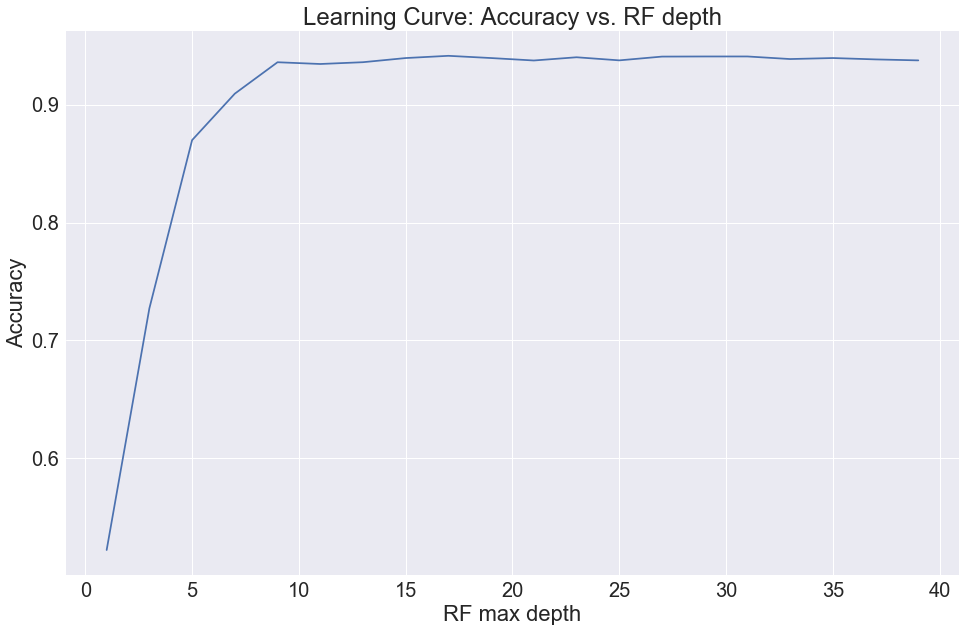

In [123]:
ax = learn_cv.plot(label = 'Accuracy',title = 'Learning Curve: Accuracy vs. RF depth',figsize=(16,10))
ax.set_xlabel("RF max depth")
ax.set_ylabel("Accuracy")

In [119]:
feature_impt = pd.Series(regr.feature_importances_, index = x.columns)
display(feature_impt.sort_values(ascending=False))

Size            0.780673
Unemployment    0.072057
CPI             0.070271
MarkDown3       0.022220
Fuel_Price      0.015405
Type            0.015039
Temperature     0.014445
MarkDown4       0.002919
MarkDown5       0.002118
IsHoliday       0.002090
MarkDown2       0.001418
MarkDown1       0.001344
dtype: float64